In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Lung Cancer.csv")

In [3]:
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [4]:
df.shape

(890000, 17)

In [5]:
df.columns

Index(['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'family_history', 'smoking_status', 'bmi', 'cholesterol_level',
       'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type',
       'end_treatment_date', 'survived'],
      dtype='object')

In [6]:
df.describe()

,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000
mean,445000.500000,55.007008,30.494172,233.633916,0.750024,0.469740,0.225956,0.088157,0.220229
std,256921.014128,9.994485,8.368539,43.432278,0.432999,0.499084,0.418211,0.283524,0.414401
min,1.000000,4.000000,16.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222500.750000,48.000000,23.300000,196.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,445000.500000,55.000000,30.500000,242.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,667500.250000,62.000000,37.700000,271.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,890000.000000,104.000000,45.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

In [8]:
df['cancer_stage'].unique()

array(['Stage I', 'Stage III', 'Stage IV', 'Stage II'], dtype=object)

In [9]:
df['family_history'].unique()

array(['Yes', 'No'], dtype=object)

In [10]:
df['smoking_status'].unique()

array(['Passive Smoker', 'Former Smoker', 'Never Smoked',
       'Current Smoker'], dtype=object)

In [11]:
df['treatment_type'].unique()

array(['Chemotherapy', 'Surgery', 'Combined', 'Radiation'], dtype=object)

In [12]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [13]:
df['survived'].value_counts()

survived
0    693996
1    196004
Name: count, dtype: int64

In [14]:
df = df.drop(columns = ['id','country','diagnosis_date','other_cancer','end_treatment_date'])

In [15]:
df.head()

,age,gender,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,treatment_type,survived
0,64.0,Male,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,Chemotherapy,0
1,50.0,Female,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,Surgery,1
2,65.0,Female,Stage III,Yes,Former Smoker,44.0,268,1,1,0,Combined,0
3,51.0,Female,Stage I,No,Passive Smoker,43.0,241,1,1,0,Chemotherapy,0
4,37.0,Male,Stage I,No,Passive Smoker,19.7,178,0,0,0,Combined,0


In [16]:
df['cancer_stage'] = df['cancer_stage'].map({'Stage I': 0, 'Stage II' : 1, 'Stage III' : 2,'Stage IV' : 3})

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                890000 non-null  float64
 1   gender             890000 non-null  object 
 2   cancer_stage       890000 non-null  int64  
 3   family_history     890000 non-null  object 
 4   smoking_status     890000 non-null  object 
 5   bmi                890000 non-null  float64
 6   cholesterol_level  890000 non-null  int64  
 7   hypertension       890000 non-null  int64  
 8   asthma             890000 non-null  int64  
 9   cirrhosis          890000 non-null  int64  
 10  treatment_type     890000 non-null  object 
 11  survived           890000 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 81.5+ MB


In [18]:
df['family_history'] = df['family_history'].map({'Yes': 1, 'No' : 0})

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                890000 non-null  float64
 1   gender             890000 non-null  object 
 2   cancer_stage       890000 non-null  int64  
 3   family_history     890000 non-null  int64  
 4   smoking_status     890000 non-null  object 
 5   bmi                890000 non-null  float64
 6   cholesterol_level  890000 non-null  int64  
 7   hypertension       890000 non-null  int64  
 8   asthma             890000 non-null  int64  
 9   cirrhosis          890000 non-null  int64  
 10  treatment_type     890000 non-null  object 
 11  survived           890000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 81.5+ MB


In [20]:
df['gender'] = df['gender'].map({'Male': 0, 'Female' : 1})

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                890000 non-null  float64
 1   gender             890000 non-null  int64  
 2   cancer_stage       890000 non-null  int64  
 3   family_history     890000 non-null  int64  
 4   smoking_status     890000 non-null  object 
 5   bmi                890000 non-null  float64
 6   cholesterol_level  890000 non-null  int64  
 7   hypertension       890000 non-null  int64  
 8   asthma             890000 non-null  int64  
 9   cirrhosis          890000 non-null  int64  
 10  treatment_type     890000 non-null  object 
 11  survived           890000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 81.5+ MB


In [22]:
df['smoking_status'] = df['smoking_status'].map({'Current Smoker': 0, 'Former Smoker' : 1, 'Passive Smoker' : 2, 'Never Smoked': 3})

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                890000 non-null  float64
 1   gender             890000 non-null  int64  
 2   cancer_stage       890000 non-null  int64  
 3   family_history     890000 non-null  int64  
 4   smoking_status     890000 non-null  int64  
 5   bmi                890000 non-null  float64
 6   cholesterol_level  890000 non-null  int64  
 7   hypertension       890000 non-null  int64  
 8   asthma             890000 non-null  int64  
 9   cirrhosis          890000 non-null  int64  
 10  treatment_type     890000 non-null  object 
 11  survived           890000 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 81.5+ MB


In [24]:
df['treatment_type'] = df['treatment_type'].map({'Chemotherapy': 0, 'Surgery' : 1, 'Combined' : 2,'Radiation': 3})

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                890000 non-null  float64
 1   gender             890000 non-null  int64  
 2   cancer_stage       890000 non-null  int64  
 3   family_history     890000 non-null  int64  
 4   smoking_status     890000 non-null  int64  
 5   bmi                890000 non-null  float64
 6   cholesterol_level  890000 non-null  int64  
 7   hypertension       890000 non-null  int64  
 8   asthma             890000 non-null  int64  
 9   cirrhosis          890000 non-null  int64  
 10  treatment_type     890000 non-null  int64  
 11  survived           890000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 81.5 MB


In [26]:
X = df.drop(columns = ['survived'] ,axis=1)
y = df['survived']

In [27]:
X.shape

(890000, 11)

In [28]:
y.shape

(890000,)

In [29]:
from sklearn.impute import SimpleImputer

In [30]:
from imblearn.over_sampling import SMOTE

In [31]:
# Step 1: Impute missing values
imputer = SimpleImputer(strategy='mean')  
X_imputed = imputer.fit_transform(X)

In [32]:
#Step 2: Apply SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X_imputed, y)

In [33]:
y_res.value_counts()

survived
0    693996
1    693996
Name: count, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pickle

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)

In [36]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [37]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.85
Confusion Matrix:
 [[133806   4808]
 [ 37046 101939]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.97      0.86    138614
           1       0.95      0.73      0.83    138985

    accuracy                           0.85    277599
   macro avg       0.87      0.85      0.85    277599
weighted avg       0.87      0.85      0.85    277599



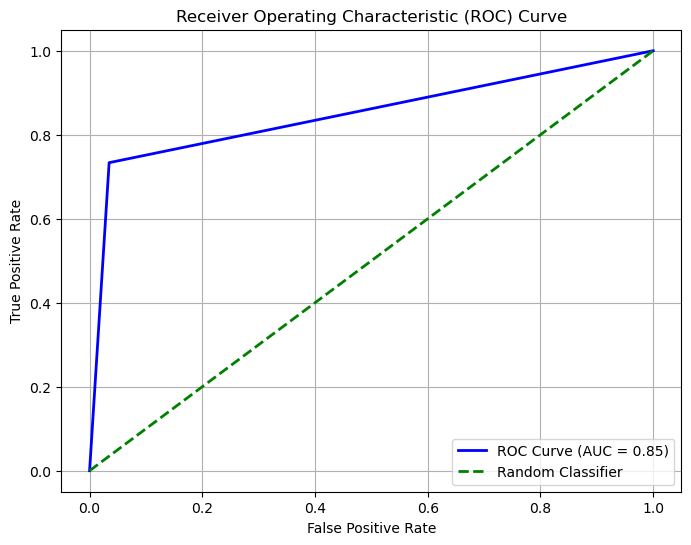

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')  
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--', label='Random Classifier') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [40]:
df['age'] = df['age'].astype(int)

In [41]:
input_data = np.array([[64,	0,	0,	1,	2,	29.4, 199,	0,	0,	1,	0]])

In [42]:
prediction = model.predict(input_data)

In [43]:
print("Prediction:", prediction)

Prediction: [0]


In [ ]:
#sns.heatmap(df.corr(),annot=True)
#import pickle
#pickle.dump(xgmodel,open("loan application approved.pkl","wb"))
#with open('stroke_model.pkl','wb') as f:
    #pickle.dump(model,f)

In [44]:
with open('lung cancer_model.pkl','wb') as f:
    pickle.dump(model,f)